<a href="https://colab.research.google.com/github/Beowulf61821/CSCI164_Code/blob/main/Classification_plots_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the diabetes dataset
diabetes = pd.read_csv('/content/drive/My Drive/CSCI 164 CSV files/diabetesNHANES.csv')

# Take a random sample of 100 rows
df = diabetes.sample(n=100, random_state=1234)
df.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
1326,101937,no,5.38,30.01,157,0,80,135
208,98270,yes,5.44,3.82,148,1,73,151
358,102289,yes,5.50,31.22,193,1,62,105
930,97041,no,5.05,11.27,134,0,69,104
319,101046,yes,8.55,13.52,105,1,69,137


## Binary outcome, two input features

In [ ]:
# Define input features and output features
X = df[['glucose', 'cholesterol']]
y = df[['outcome']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# prompt: Generate a train test split for X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [ ]:
# Initialize and fit a LDA model
ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(X_train, np.ravel(y_train))

LinearDiscriminantAnalysis()

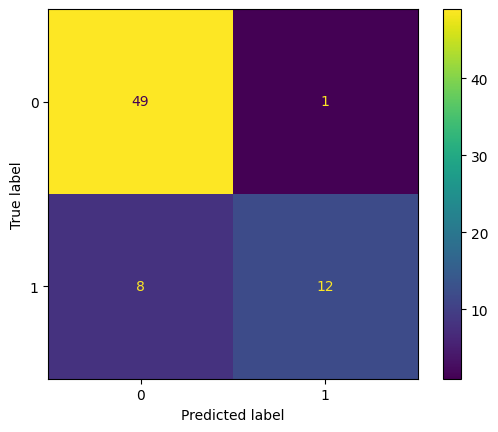

In [ ]:
# Confusion matrix plot for ldaModel
ConfusionMatrixDisplay.from_estimator(ldaModel, X_train, y_train)
plt.show()

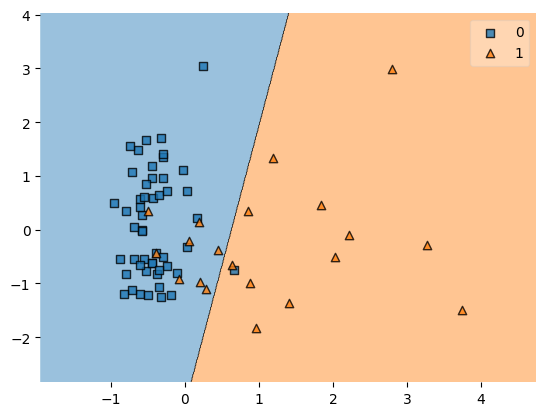

In [ ]:
# Decision boundary plot for ldaModel
plot_decision_regions(X_train, np.ravel(y_train), clf=ldaModel)
plt.show()

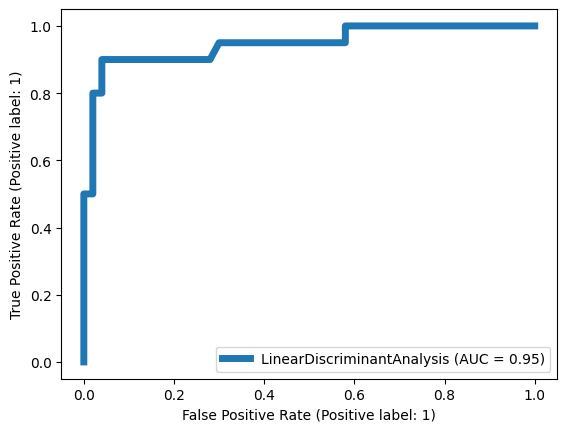

Accuracy for training:  0.8714285714285714
Accuracy for test:  0.9333333333333333


In [ ]:
# prompt: Generate the ROC Curve for ldaModel
# This code is generated by Google Gemini
# I just adjusted the linewidth of the plot
RocCurveDisplay.from_estimator(ldaModel, X_train, y_train, linewidth=5)
plt.show()

#This part is not generated by Google Gemini
print('Accuracy for training: ', ldaModel.score(X_train, y_train))
print('Accuracy for test: ', ldaModel.score(X_test, y_test))

In [ ]:
# Initialize and fit a Gaussian naive Bayes model
gnbModel = GaussianNB()
gnbModel.fit(X_train, np.ravel(y_train))

GaussianNB()

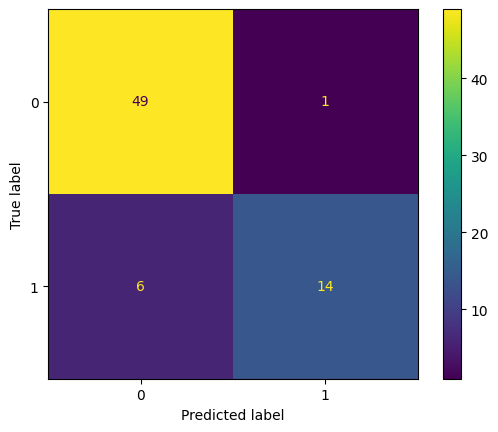

In [ ]:
# Confusion matrix plot for gnbModel
ConfusionMatrixDisplay.from_estimator(gnbModel, X_train, y_train)
plt.show()

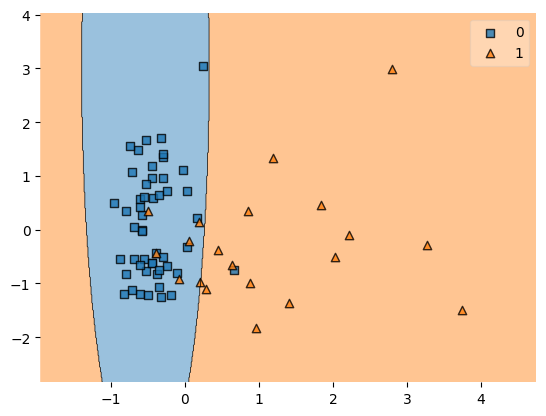

In [ ]:
# Decision boundary plot for ldaModel
plot_decision_regions(X_train, np.ravel(y_train), clf=gnbModel)
plt.show()

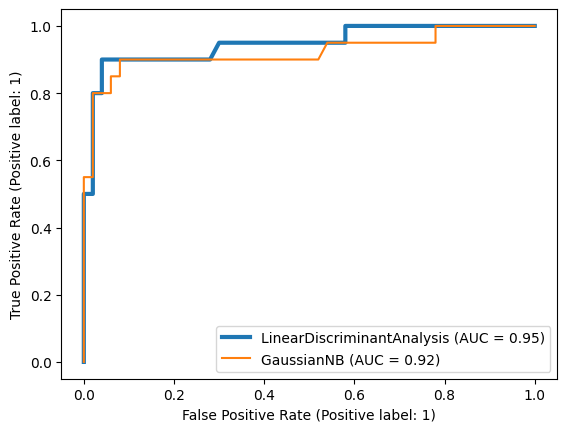

In [ ]:
# ROC curves for both ldaModel and gnbModel

# ROC curve for ldaModel
lda_plot = RocCurveDisplay.from_estimator(ldaModel, X_train, y_train, linewidth=3)

# ROC curve for gnbModel, added to lda_plot by adding ax=lda_plot.ax_
gnb_plot = RocCurveDisplay.from_estimator(gnbModel, X_train, y_train, ax=lda_plot.ax_, linewidth=1.5)
plt.show()

In [ ]:
# Compute AUC for ldaModel
ldaAUC = roc_auc_score(y, ldaModel.predict_proba(X)[:, 1])
print('LDA AUC = ', ldaAUC)

# Compute AUC for gnbModel
gnbAUC = roc_auc_score(y, gnbModel.predict_proba(X)[:, 1])
print('GaussianNB AUC = ', gnbAUC)

# Accuracy
print('Accuracy for training: ', gnbModel.score(X_train, y_train))
print('Accuracy for test: ', gnbModel.score(X_test, y_test))

LDA AUC =  0.9354666666666667
GaussianNB AUC =  0.9146666666666666
Accuracy for training:  0.9
Accuracy for test:  0.9333333333333333


## Multi-class outcome, two input features

In [ ]:
# Create integer-valued diabetes
df['diabetes_int'] = df['diabetes'].replace(to_replace = ['no','pre', 'yes'],
                                                      value = [int(0), int(1), int(2)])

# Define input features and output features
X = df[['glucose', 'cholesterol']]
yMC = df[['diabetes_int']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# prompt: Generate train test splits for X and y of knnModel

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, yMC, test_size=0.3, random_state=1234)


In [ ]:
# Initialize and fit a k-nearest neighbors model
knnModel = KNeighborsClassifier(n_neighbors=7)
knnModel.fit(X_train_knn, np.ravel(y_train_knn))

KNeighborsClassifier(n_neighbors=7)

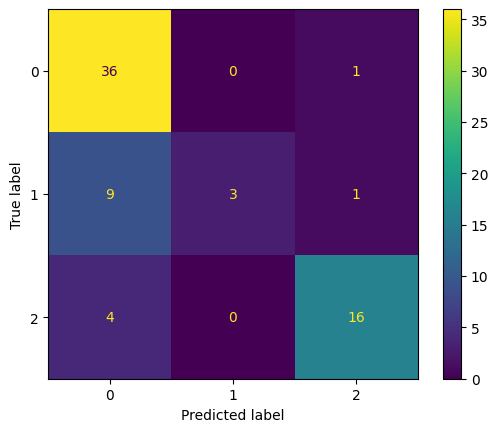

In [ ]:
# Confusion matrix plot for knnModel
ConfusionMatrixDisplay.from_estimator(knnModel, X_train_knn, y_train_knn)
plt.show()

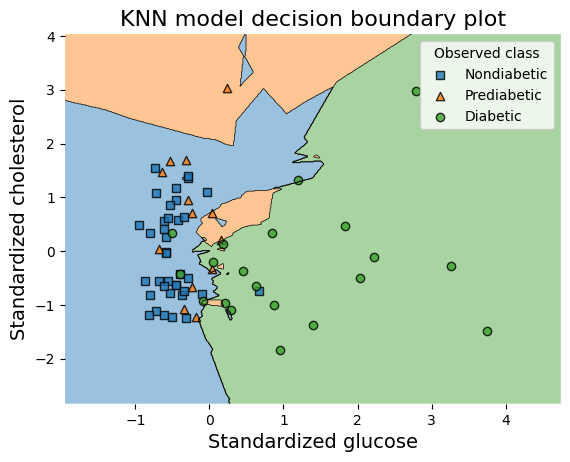

In [ ]:
# Plot decision boundary regions
p=plot_decision_regions(X_train_knn, np.ravel(y_train_knn), clf=knnModel)

# Add title and axis labels
p.set_title('KNN model decision boundary plot', fontsize=16)
p.set_xlabel('Standardized glucose', fontsize=14)
p.set_ylabel('Standardized cholesterol', fontsize=14)

# Add legend
L = plt.legend(title='Observed class')
L.get_texts()[0].set_text('Nondiabetic')
L.get_texts()[1].set_text('Prediabetic')
L.get_texts()[2].set_text('Diabetic')

plt.show()

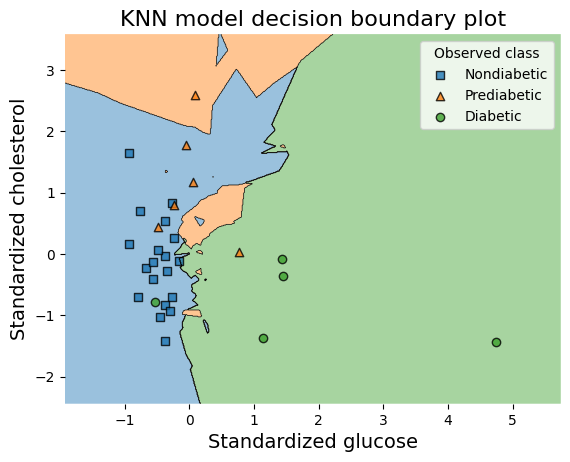

In [ ]:
# Plot decision boundary regions
p=plot_decision_regions(X_test_knn, np.ravel(y_test_knn), clf=knnModel)

# Add title and axis labels
p.set_title('KNN model decision boundary plot', fontsize=16)
p.set_xlabel('Standardized glucose', fontsize=14)
p.set_ylabel('Standardized cholesterol', fontsize=14)

# Add legend
L = plt.legend(title='Observed class')
L.get_texts()[0].set_text('Nondiabetic')
L.get_texts()[1].set_text('Prediabetic')
L.get_texts()[2].set_text('Diabetic')

plt.show()

In [ ]:
print('Accuracy for training: ', knnModel.score(X_train_knn, y_train_knn))
print('Accuracy for test: ', knnModel.score(X_test_knn, y_test_knn))

Accuracy for training:  0.7857142857142857
Accuracy for test:  0.8


## Logistic regression model, binary outcome

In [ ]:
# Define input features and output features
X = df[['glucose', 'cholesterol']]
y = df[['outcome']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# prompt: Generate train test splits of X and y for LRModel

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=1234)


In [ ]:
# Initialize and fit a logistic regression model
LRModel = LogisticRegression(penalty=None)
LRModel.fit(X_train_lr, np.ravel(y_train_lr))

LogisticRegression(penalty=None)

### Add code below to generate plots for the fitted logistic regression model

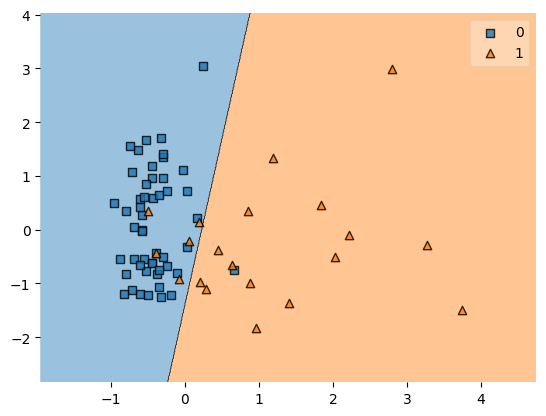

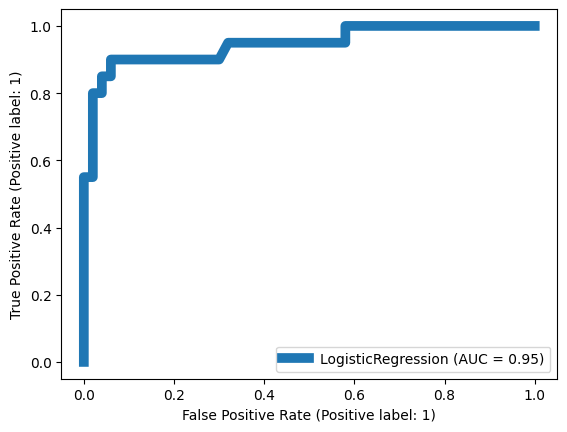

In [ ]:
plot_decision_regions(X_train_lr, np.ravel(y_train_lr), clf=LRModel)
lr_plot = RocCurveDisplay.from_estimator(LRModel, X_train_lr, y_train_lr, linewidth = 7)
plt.show()

In [ ]:
lrAUC = roc_auc_score(y_train_lr, LRModel.predict_proba(X_train_lr)[:, 1])
print('LR AUC = ', lrAUC)

LR AUC =  0.9455


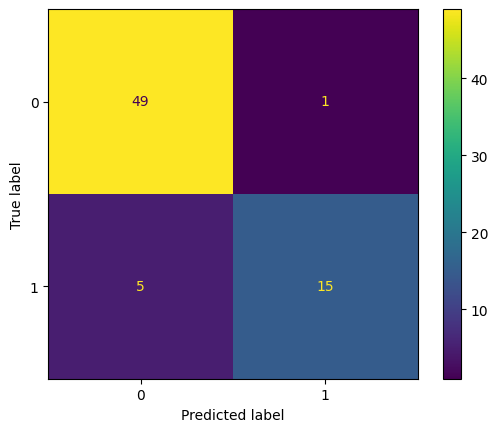

In [ ]:
# prompt: Generate and plot the confusion model for LRModel
# This code was generated using Google Gemini
# Generate and plot the confusion model for LRModel
ConfusionMatrixDisplay.from_estimator(LRModel, X_train_lr, y_train_lr)
plt.show()


In [ ]:
print('Accuracy for training: ', LRModel.score(X_train_lr, y_train_lr))
print('Accuracy for test: ', LRModel.score(X_test_lr, y_test_lr))

Accuracy for training:  0.9142857142857143
Accuracy for test:  0.9333333333333333
